<a href="https://colab.research.google.com/github/musicjae/Reinforcement_Learning/blob/master/intro_RL/2_cartpole(dqn_theory).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Mount & Data Load

In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'Colab Notebooks/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn]))) 

Saving dqn6.png to dqn6.png
User uploaded file "dqn6.png" with length 52614 bytes


In [2]:
from IPython.display import Image

# 1. DQN Algorithm. 
  
경험 리플레이를 사용하여, Q 러닝의 Q 함수 업데이트 방법을 사용한다. ( 딥살사와 다르다)

## 1.1 DQN  
  
대략적으로 말하자면, DQN = CNN + Q-learning 으로 간주될 수 있다.  
  
CNN? Refer to https://jysden.tistory.com/51  
  
아래서 소개된 논문에서, DQN은 다음과 같이 정의된다: "We refer to convolutional networks trained with our approach as Deep Q-Networks (DQN)."

## 1.2 왜 DQN이 중요한가?  


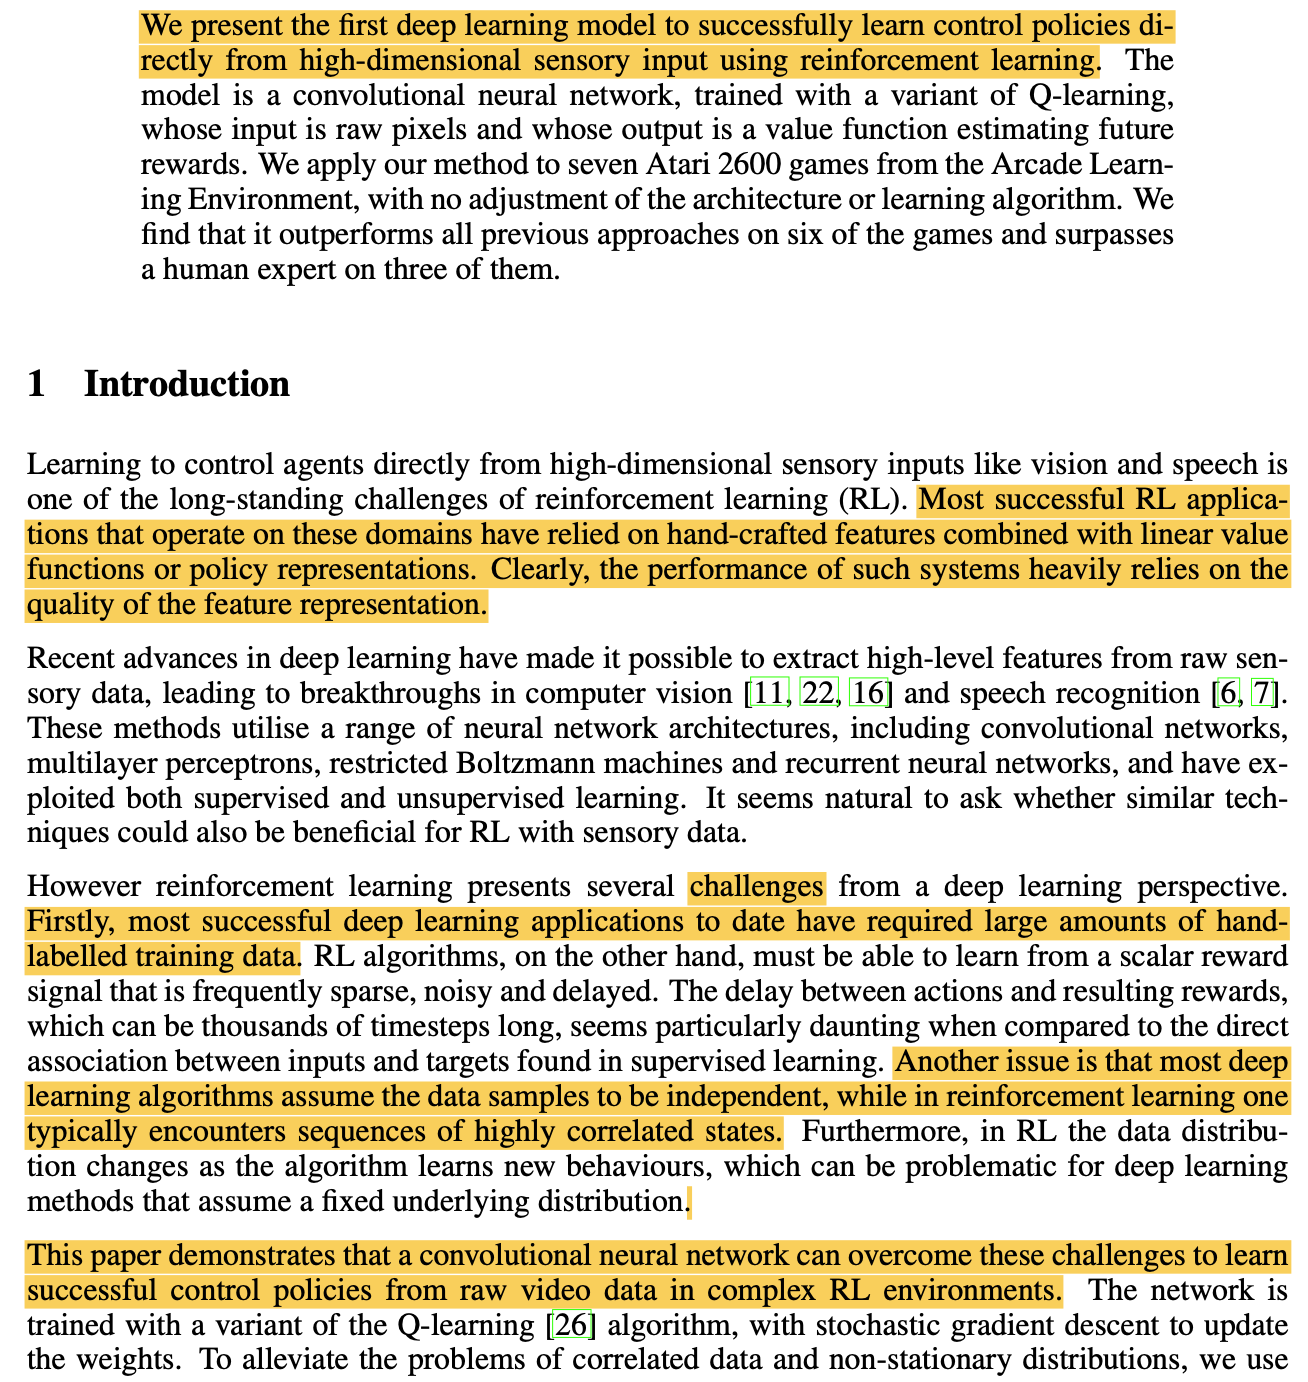

In [4]:
Image('dqn3.png',width=600)

- **The** **second** **issue**: 다음 state는 현재 state에 의존하여 결정되기 때문에, RL env에서는 states의 상관성이 높다.

#  2. Cartpole introduced in 'AG Barto's paper'  

 - 영상 설명:   
[A video of what is the Cartpole](https://www.youtube.com/watch?v=TdA0APWRCx0)  
  
- 에이전트의 목표: pole이 넘어지지 않도록 cart를 움직이는 것. 여기서는 5 초 동안 pole이 넘이지지 않게 하는 것을 목표로 한다. (1) 폴이 일정 각도 이상으로 떨어지거나, (2) 화면을 벗어나면, episode가 종료.  


## 2.1  에이전트의 상태  
  
에이전트의 상태 = $[x, x', \theta, \theta']$

### 2.1.1  
  
- $x$: cart의 수평선 상의 위치  
- $x'$: 속도  
- $\theta$: pole이 수직선으로부터 기울어진 각도  
- $\theta'$: 각속도  


# 3. DQN Theory introduced in 'Playing Atari with Deep Reinforcement Learning' (2013)

## 3.1 경험 리플레이 The experience Replay  
  
&nbsp;&nbsp;&nbsp;&nbsp; 우리는 Q-러닝과 ANN을 사용하기 위해 Experience Replay를 사용해야 한다.

### 3.1.0 간략한 표준 Q-러닝 복습  
  
- (1) 현재 시간 t에 대하여, $\epsilon$-탐욕 정책에 따라 "$S_t$에 있는 행동 $a_t$"를 선택한다.  
- (2) 보상 r과 다음 상태 $S_{t+1}을 환경으로부터 받는다.  

- (3) 위 과정에 따라 에이전트가 $S_{t+1}$을 알게 되면, $S_{t+1}$에서 가장 큰 Q함수를 이용하여 $S_{t+1}$에서의 Q함수를 **업데이트**한다.

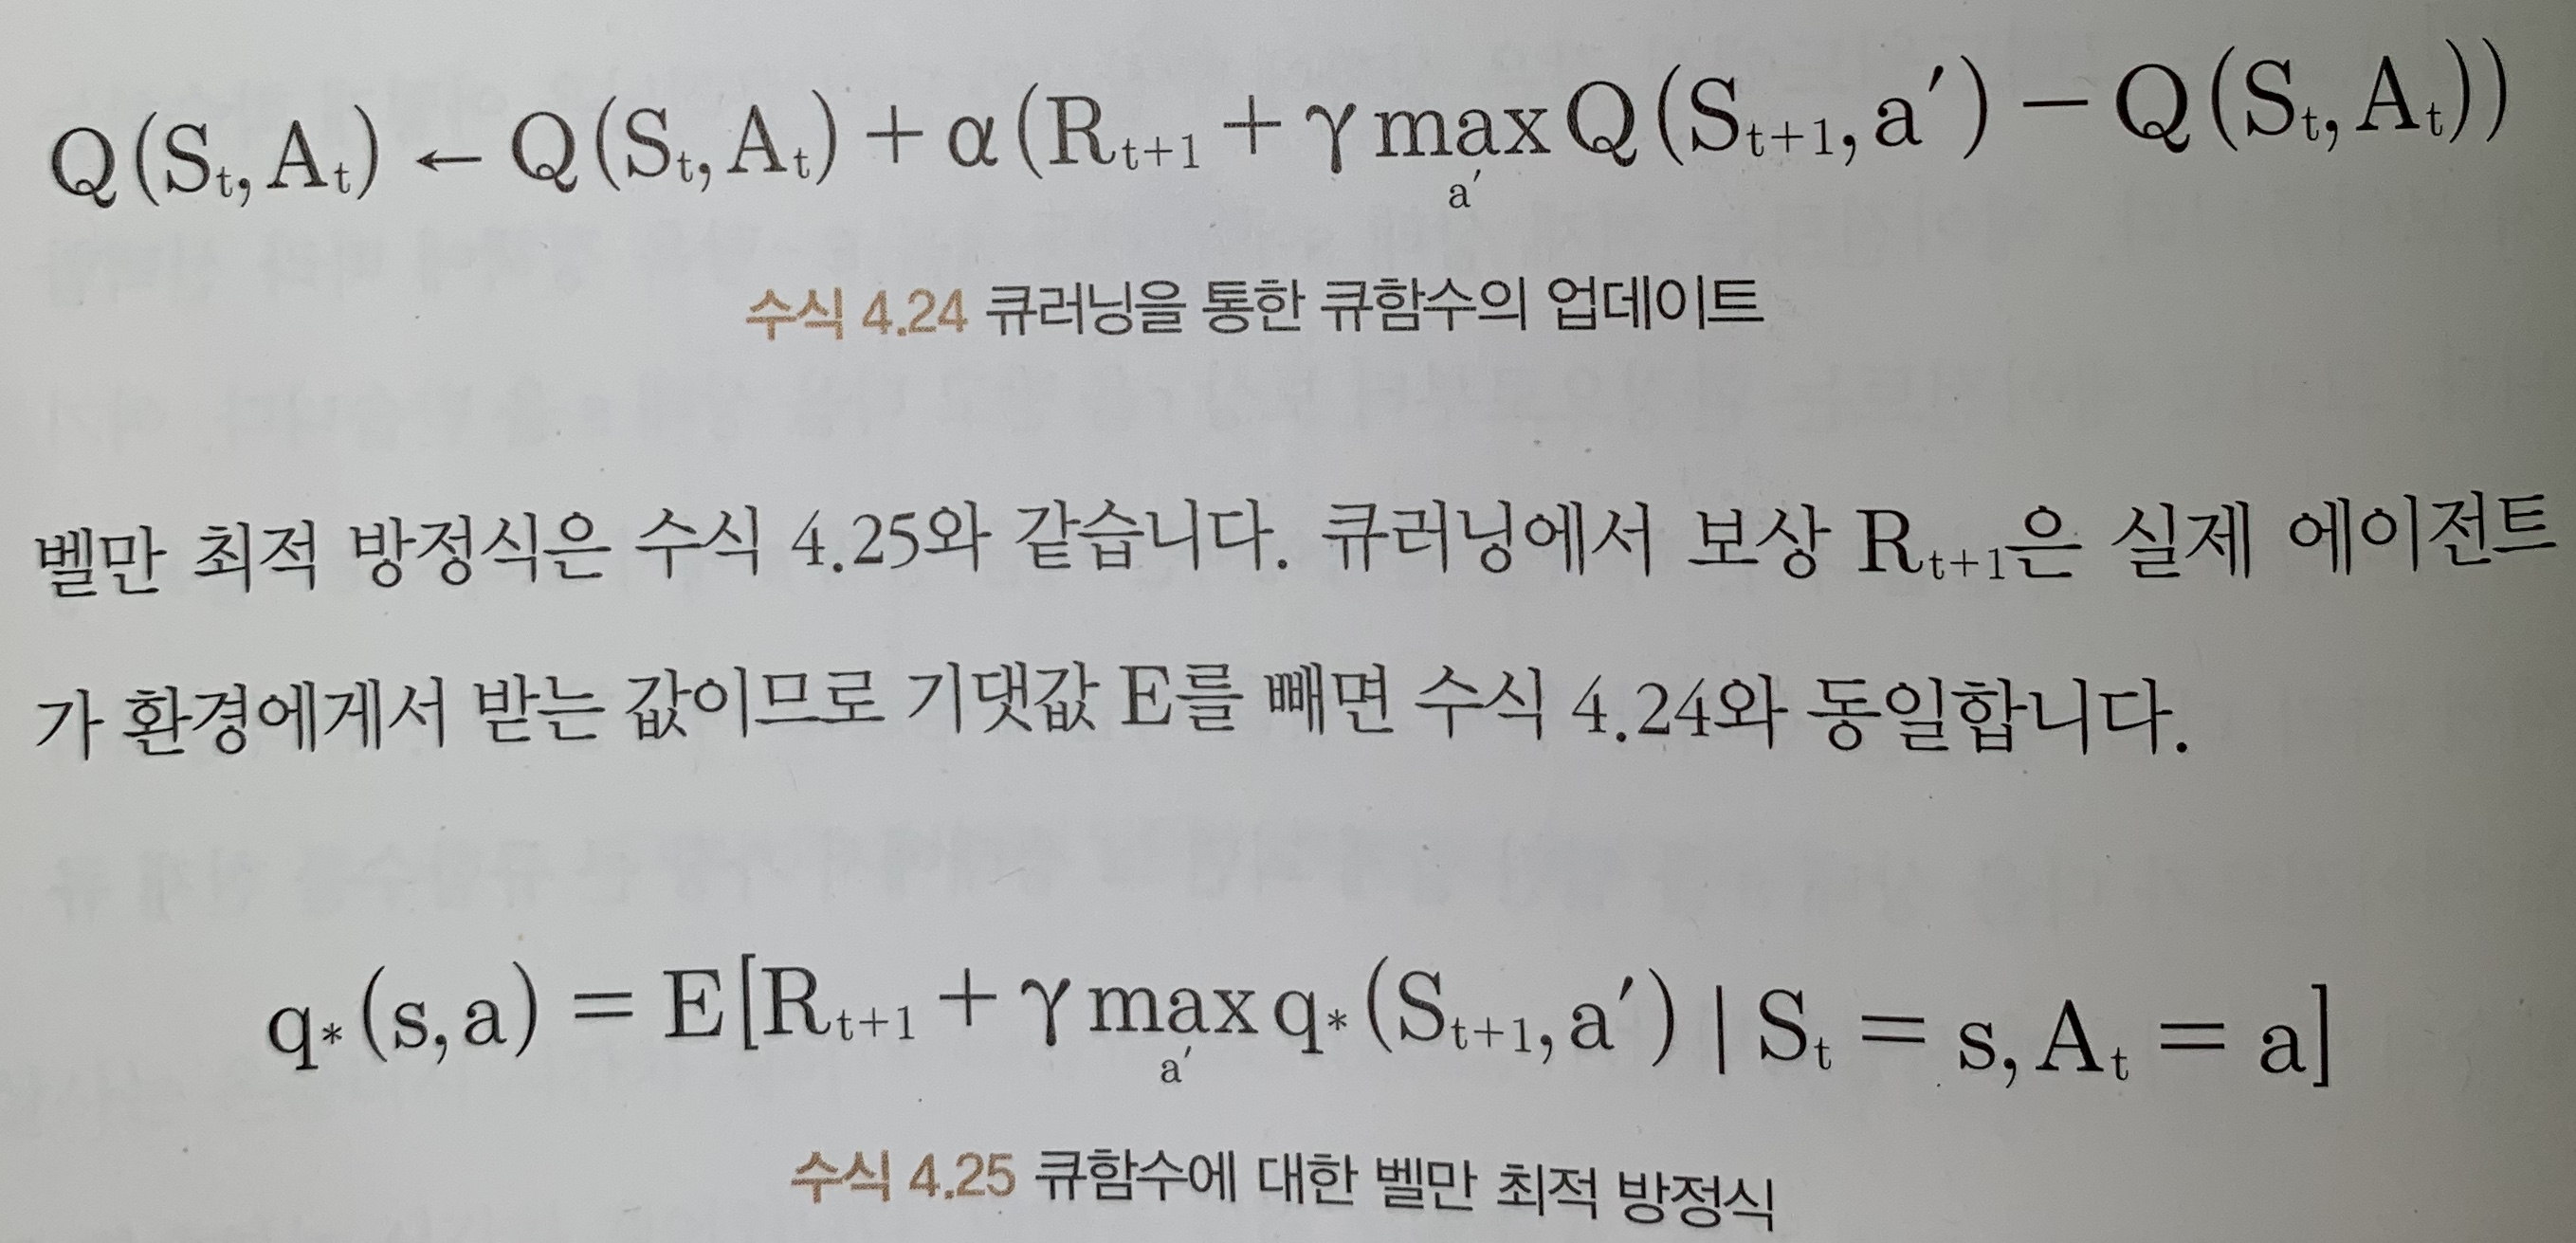

In [11]:
Image('dqn5.JPG',width=600)

큐러닝 유사코드 https://www.cse.unsw.edu.au/~cs9417ml/RL1/algorithms.html

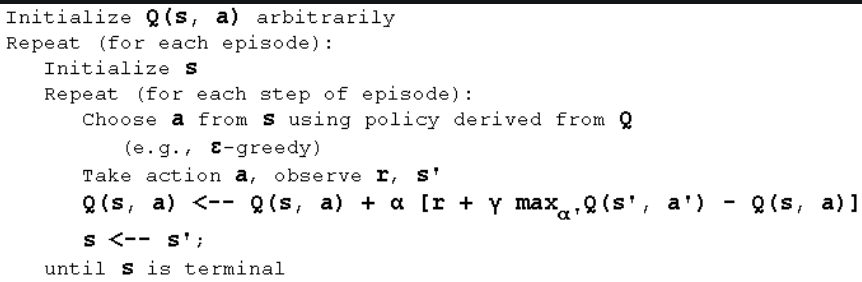

In [14]:
Image('dqn6.png',width=600)

### 3.1.1 경험 리플레이란?  
  
 - : 에이전트가 환경env에서 explore 하여 얻은 샘플 $(s,a,r,s')$를 memory~(name: Replay Memory)~에 저장하는 것

### 3.1.2 에이전트가 학습하는 방법  
  
- (1) Choose randomly a various of samples in replay memory  
  
- (2) Update ANN for the choosed samples at every timestep  
  
- (3) If the memory was full, then delete it in order from the initial input.  
  
$\to$ 에이전트가 학습을 해서 점점 높은 점수를 받게 되면, **더** **좋은** **샘플들**이 replay memory에 저장된다.



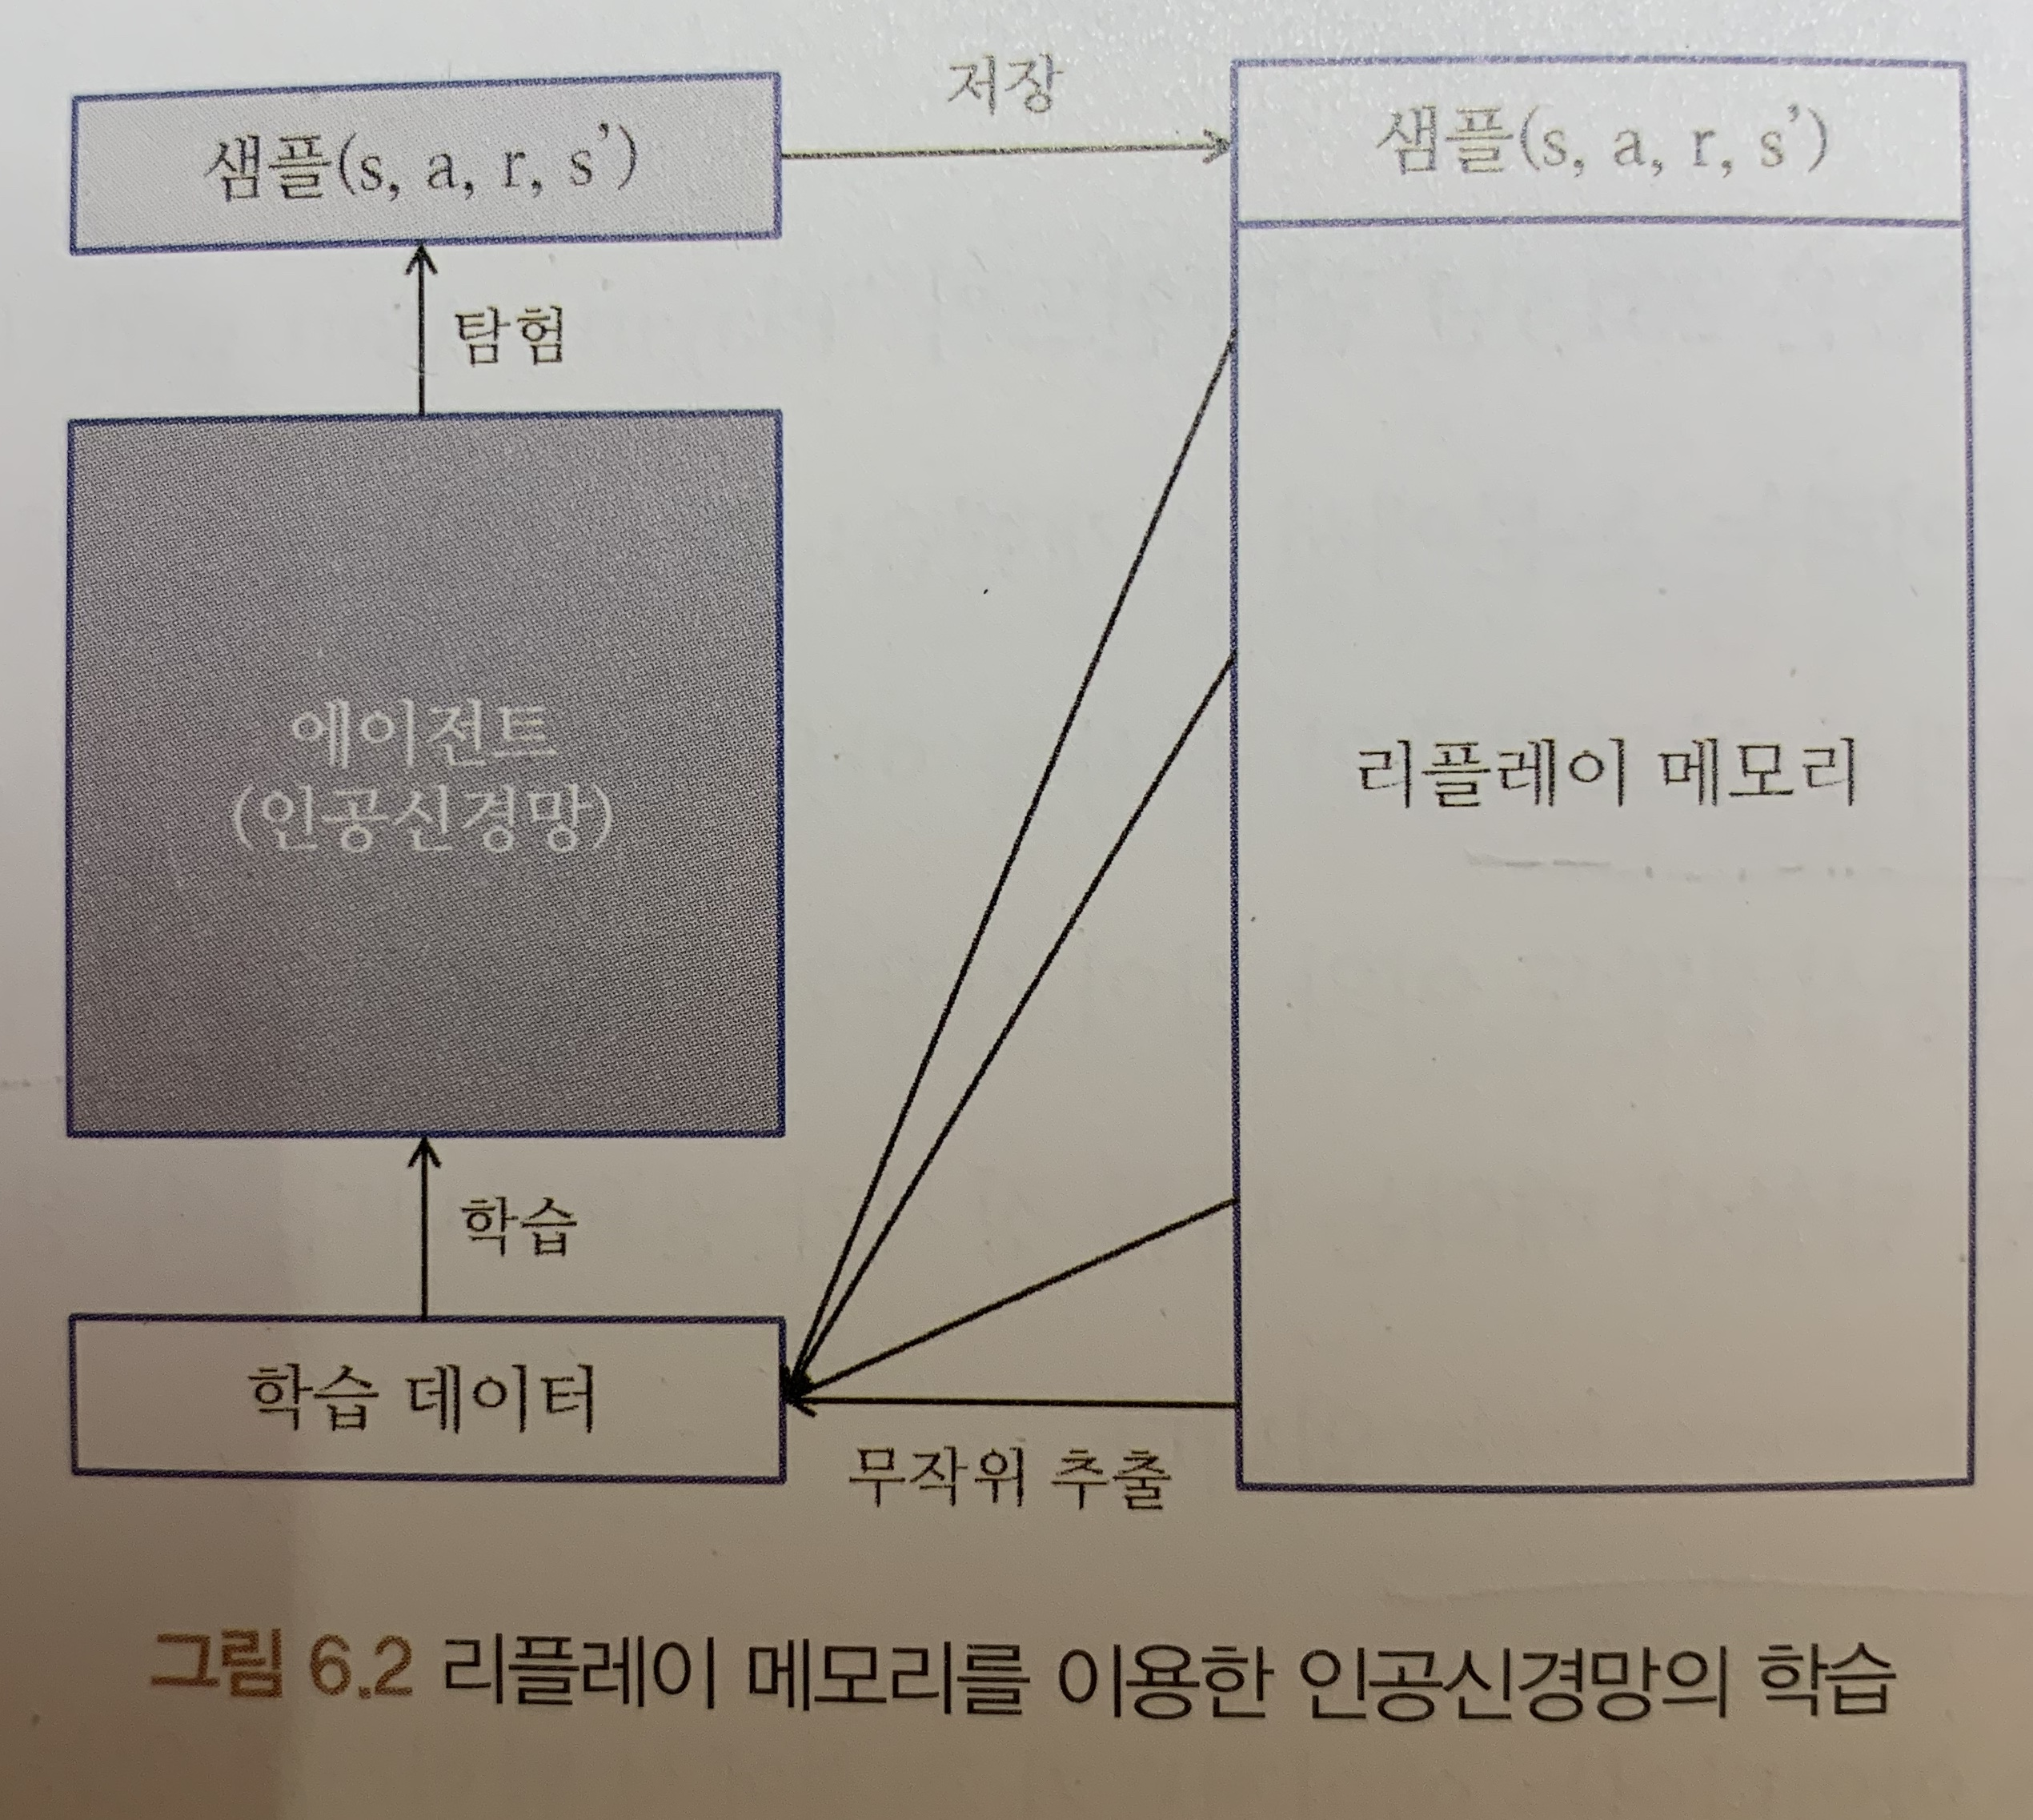

In [3]:
Image('dqn2.JPG',width=600)

### 3.1.3 경험 리플레이를 이용한 Q-러닝 유사 코드  
  
이것은 표준적인 Q-러닝과 다르다. 

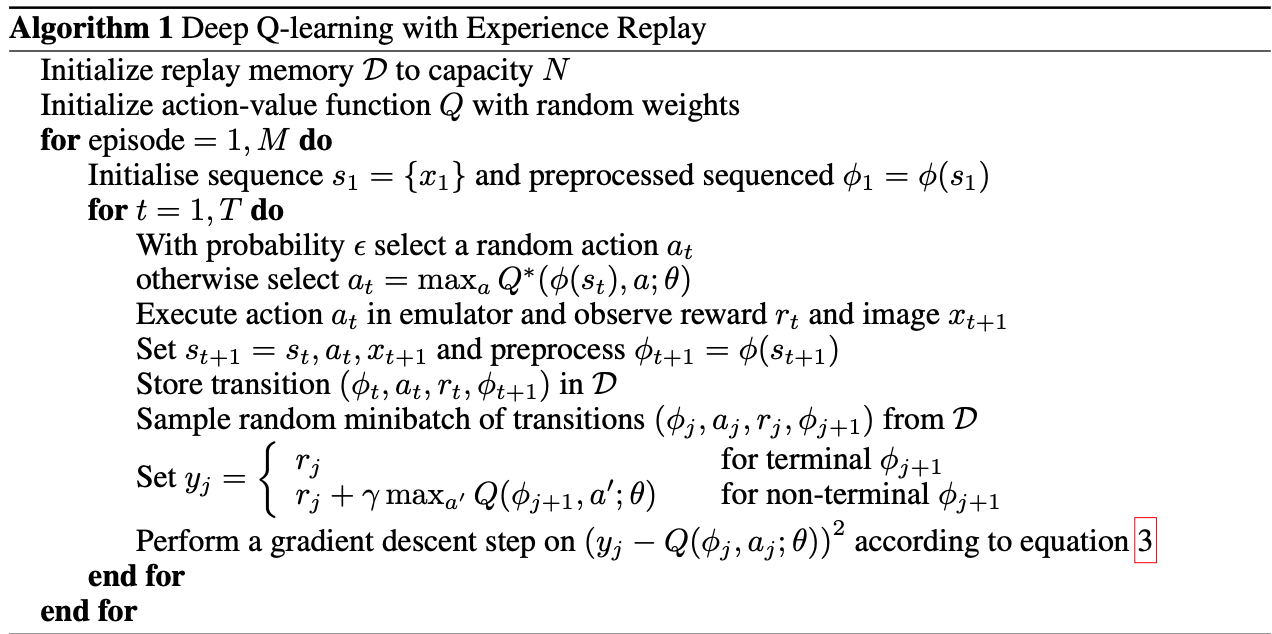

In [8]:
Image('dqn4.png',width=600)

설명:  
- (1) 매 timestep 마다 에이전트의 경험 ---- 데이터 셋 내의 $D= e_1, ..., e_n$ 중 임의의 하나인 $e_t = (s_t, a_t, r_t, s_{t+1})$ ----을 저장  
- (2) 저장된 경험의 샘플들에 대해 Q-러닝 업데이트 수행  

- (3) 위 과정을 통해 경험 리플레이를 수행한 뒤에, 에이전트는 $\epsilon$-탐욕 정책에 따라 action을 선택하고 수행한다. 

### 3.1.4 리플레이 메모리의 장점  
  
- (1) 학습에서 사용하는 samples은 서로 temporal correlation이 있지 않다.   
> **이것은** 모델이 안 좋은 방향으로만 계속 학습하는 현상을 방지할 수 있다.  
  
- (2) **리플레이 메모리**에서 임의적인 방식으로 추출된 샘플들을 사용하기 때문에, 학습 과정이 안정적이다.  
> 여러 data에서 gradient를 구하는 것이 ANN을 더 안정적으로 만든다.

##3.2 경험 리플레이의 특징  
  

### 3.2.1 Off - Policy 에 적합  
  
[경험 리플레이]는 ---- **지금** **에이전트가** **경험하고** **있는** **상황** (현재 정책으로부터 발생한 상황) ---- 이 아닌, **다양한** **과거의** **상황**  (이전 정책으보퉈 발생한 상황)으로부터 학습한다. 따라서, off-policy 알고리즘이 적합하다.

## 3.2.2 DQN은 타깃 신경망을 사용한다  


#### 3.2.2.1 MSE
  
 **MSE** $= (grounded\ \ truth - the\ \ predicted)^2$  
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$= [(R_{t+1} + \gamma max_{a'}\  Q(s', a', \theta)) - Q(s,a,\theta)]^2\ \ \ \ where\ \ s',\ \  a'\ \ are\ \ next\ \ state,\ \  action$
          

         
> MSE가 최소가 되는 방향으로 ANN이 업데이트된다.  



##### 3.2.2.2 부트스트랩으로 인해 마주치는 곤경을 피하기  

[Review]  

 
- 부트스트랩 (Bootstrap) : 다른 State의 가치함수 예측값을 통해 지금 State의 가치함수를 예측하는 방식  
  
DQN 경우에, 부트스트랩 방식으로 인해 업데이트 목표인 **정답**이 계속 변할 수 있다. 설상가상으로, "정답을 만들어내는 ANN" 자체도 계속 업데이트 되면, 이 곤경은 더욱 심화될 것.
  
[Resolution]  
  
- (1) 정답을 만들어내는 ANN을 일정 시간동안 유지해준다  
- (2) 타깃 신경망(TNN)을 따로 만든 뒤, 그 TNN에서 정답에 해당하는 값을 구한다  
- (3) (2)에서 구한 정답으로 다른 ANN을 학습시킨다. TNN은 일정 timestep 마다 그 ANN을 업데이트시킨다.

#### 3.2.2.3 The Final MSE  
타깃 네트워크를 이용한 DQN의 오류함수 정의  
  

- MSE = (정답 - 예측)$^2$ = $(R_{t+1} + \gamma\ max_{a'}\ Q(S_{t+1},\ a',\ ,\theta^-) - Q(S_t,\ A_t\ ,\theta))^2$  


## 3.3 Applications

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
____________________________________

KeyboardInterrupt: ignored

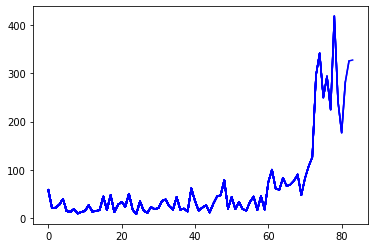

In [5]:
import sys
import gym
import pylab
import random
import numpy as np
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential

EPISODES = 300


# 카트폴 예제에서의 DQN 에이전트
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.render = False
        self.load_model = False

        # 상태와 행동의 크기 정의
        self.state_size = state_size
        self.action_size = action_size

        # DQN 하이퍼파라미터
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.train_start = 1000

        # 리플레이 메모리, 최대 크기 2000
        self.memory = deque(maxlen=2000)

        # 모델과 타깃 모델 생성
        self.model = self.build_model()
        self.target_model = self.build_model()

        # 타깃 모델 초기화
        self.update_target_model()

        if self.load_model:
            self.model.load_weights("drive/My Drive/Colab Noteboolks/rl/rl_intro/dqn(cartpole)/cartpole_dqn_trained.h5")

    # 상태가 입력, 큐함수가 출력인 인공신경망 생성
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(24, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # 타깃 모델을 모델의 가중치로 업데이트
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # 입실론 탐욕 정책으로 행동 선택
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # 샘플 <s, a, r, s'>을 리플레이 메모리에 저장
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    # 리플레이 메모리에서 무작위로 추출한 배치로 모델 학습
    def train_model(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        # 메모리에서 배치 크기만큼 무작위로 샘플 추출
        mini_batch = random.sample(self.memory, self.batch_size)

        states = np.zeros((self.batch_size, self.state_size))
        next_states = np.zeros((self.batch_size, self.state_size))
        actions, rewards, dones = [], [], []

        for i in range(self.batch_size):
            states[i] = mini_batch[i][0]
            actions.append(mini_batch[i][1])
            rewards.append(mini_batch[i][2])
            next_states[i] = mini_batch[i][3]
            dones.append(mini_batch[i][4])

        # 현재 상태에 대한 모델의 큐함수
        # 다음 상태에 대한 타깃 모델의 큐함수
        target = self.model.predict(states)
        target_val = self.target_model.predict(next_states)

        # 벨만 최적 방정식을 이용한 업데이트 타깃
        for i in range(self.batch_size):
            if dones[i]:
                target[i][actions[i]] = rewards[i]
            else:
                target[i][actions[i]] = rewards[i] + self.discount_factor * (
                    np.amax(target_val[i]))

        self.model.fit(states, target, batch_size=self.batch_size,
                       epochs=1, verbose=0)


if __name__ == "__main__":
    # CartPole-v1 환경, 최대 타임스텝 수가 500
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # DQN 에이전트 생성
    agent = DQNAgent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        # env 초기화
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            # 현재 상태로 행동을 선택
            action = agent.get_action(state)
            # 선택한 행동으로 환경에서 한 타임스텝 진행
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            # 에피소드가 중간에 끝나면 -100 보상
            reward = reward if not done or score == 499 else -100

            # 리플레이 메모리에 샘플 <s, a, r, s'> 저장
            agent.append_sample(state, action, reward, next_state, done)
            # 매 타임스텝마다 학습
            if len(agent.memory) >= agent.train_start:
                agent.train_model()

            score += reward
            state = next_state

            if done:
                # 각 에피소드마다 타깃 모델을 모델의 가중치로 업데이트
                agent.update_target_model()

                score = score if score == 500 else score + 100
                # 에피소드마다 학습 결과 출력
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("dqn1.png")
                print("episode:", e, "  score:", score, "  memory length:",
                      len(agent.memory), "  epsilon:", agent.epsilon)

                # 이전 10개 에피소드의 점수 평균이 490보다 크면 학습 중단
                if np.mean(scores[-min(10, len(scores)):]) > 490:
                    agent.model.save_weights("./save_model/cartpole_dqn.h5")
                    sys.exit()

# References  
  
[1] 파이썬과 케라스로 배우는 강화학습  
[2] Playing Atari with Deep Reinforcement Learning (2013)  
[3] https://www.cse.unsw.edu.au/~cs9417ml/RL1/algorithms.html  
[4]